In [101]:
from scipy.special import ellipk, ellipj
from scipy.fftpack import fft, ifft
from numpy import sin,linspace,pi,arange,arcsin,sqrt,cos,meshgrid
from matplotlib.pyplot import plot,xlim,ylim,show,xticks,yticks,xlabel,ylabel,axhline,legend,title,scatter,contour

Assume that string is massless and rigid and that friction is neglected. Let $phi_0$ be the maximum displacement angle. Set $\sqrt{(l/g)}$ as 1 to normalize.

In [82]:
def T(phi0):
    return 4*ellipk(sin(phi0/2)**2) #complete elliptic integral of the first kind
phi0list = linspace(0,pi,1000)
Tlist = T(phi0list)

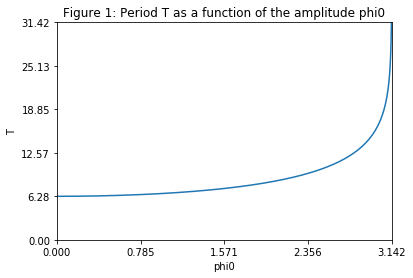

In [83]:
plot(phi0list,Tlist)
xlim(0,pi)
ylim(0,10*pi)

yticks(arange(0,12*pi,2*pi))
xlabel("phi0")
ylabel("T")
title('Figure 1: Period T as a function of the amplitude phi0')
show()

## Obervation: 
At first, increasing phi0 does not deviate T greatly from the value for the harmonic pendulum T = 2pi = 6.28. <br>
Only for amplitudes above pi/2 is T significantly larger.

## Theory:
### For simple pendulum:
With the assumption of small angles, f and T of the pendulum are independent of the phi0. <br>
All simple pendulums should have the same T regardless of the phi0. <br>
T of a simple pendulum does not depend on m or phi0, but on L and g.
### For real (nonlinear) pendulum:
When phi0 is large enough that m r holds, then the equation of motion remain is nonlinear. <br>
Therefore, T is related to phi0. 


In [84]:
def psi(t, phi0):
    return ellipj(t,sin(phi0/2)**2)[3] #get the fourth element of the lsit
def sinepsi(t, phi0):
    return ellipj(t,sin(phi0/2)**2)[0] #get the first element of the lists
def phinorm(x, phi0):
    return 2*arcsin(sin(phi0/2)*sinepsi(x*T(phi0), phi0))/phi0
phi0 = [pi/10, 4*pi/5, 19*pi/20, 99*pi/100, 999*pi/1000]
x = linspace(0,1,100)

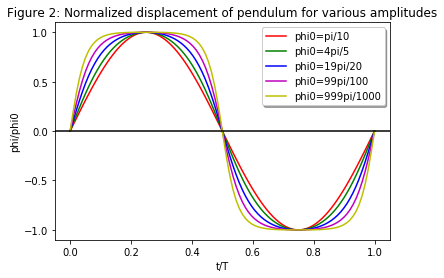

In [85]:
plot(x,phinorm(x,phi0[0]),'r',label='phi0=pi/10')
plot(x,phinorm(x,phi0[1]),'g',label='phi0=4pi/5')
plot(x,phinorm(x,phi0[2]),'b',label='phi0=19pi/20')
plot(x,phinorm(x,phi0[3]),'m',label='phi0=99pi/100')
plot(x,phinorm(x,phi0[4]),'y',label='phi0=999pi/1000')
xticks(arange(0,1.2,0.2))
yticks(arange(-1,1.5,0.5))
xlabel('t/T')
ylabel('phi/phi0')
axhline(0,color='k')
legend(loc='upper right', shadow=True, fontsize='medium')
title('Figure 2: Normalized displacement of pendulum for various amplitudes')
show()

### Observation:
For small phi0, we have a sinusoidal oscillation. <br>
For increasing phi0, the time the pendulum spends near the apex (+-phi0) becomes larger. <br>
phi(t) becomes flatter and turns into a step function. <br>

In [86]:
 N = 100
s = arange(1,N+1)
flist = abs(fft(phinorm(x,phi0[3])))/sqrt(N)

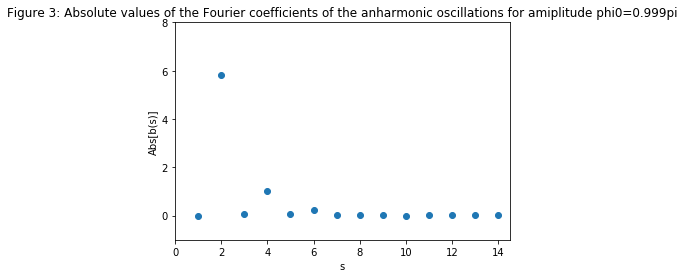

In [94]:
scatter(s,flist)
xlim(0,14.5)
ylim(-1,8)
xticks(arange(0,16,2))
yticks(arange(0,10,2))
xlabel('s')
ylabel('Abs[b(s)]')
title('Figure 3: Absolute values of the Fourier coefficients of the anharmonic oscillations for amiplitude phi0=0.999pi')
show()

## Observation:
b(s) vanishes for all odd s because of the symmetry phi(T/2+t) = -phi(t) <br>
The first non vanishing coefficient b(2) is the amplitude of the fundamental harmonic w(2) = 2pi/T. <br>
The other coefficients b(4), b(6), b(8),... yields the amplitude of the higher harmonics 3w(2), 5w(2), 7w(2),...

In [105]:
def E(phidot, phi):
    return (phidot**2)/2-cos(phi)
phidot = linspace(-3,3,100)
phi = linspace(-pi,pi,100)
X,Y = meshgrid(phi,phidot) #return coordinate matrices from coordinate vectors 
#creates a rectangular grid out of an array of phi and phidot values
Z = E(Y,X)

Text(0,0.5,'$ \\dot{\\phi}$')

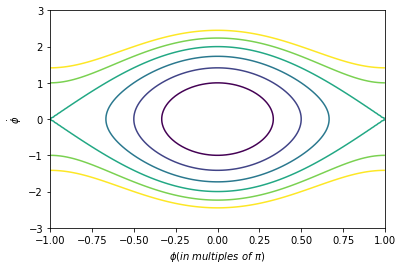

In [106]:
contour(phi/pi, phidot, Z, levels=[-0.5,0,0.5,1.0,1.5,2.0])
xlabel("$ \phi(in\ multiples\ of\ \pi)$")
ylabel("$ \dot{\phi}$")

E/(mgl) = -1/2, 0, 1/2, 1, 3/2, 2 

### Observation:
For small phi0, one obtains a circle that becomes deformed as the energy increases. <br>
For E > mgl, the pendulum overshoots its apex. <br>
It moves in only one direction and has an angular velocity not equal to 0 even at the apex. 